**Stroke Analysis.**

In [1]:
%pip install kagglehub

# Introduction

According to Google definition, stroke is a condition of brain damage that cause by reduced or any interruption of blood supply to the brain. Stroke or Cerebrovascular Accident resulted in difficulty of walking, speaking, and understanding. This condition required an urgent treatment as it is lifetaking.

There are several factors contribute to this condition, and one of it is a bad hygiene. This include less exercise frequencies, eating junkfood, working condition, and many more. Based on WHO data, stroke in Indonesia reaches up to estimation of 350k+ deaths which is nearly 21.2% of the total cased. Indonesia stroke cases placed at index 11.

Therefore, with analyzing datasets which have several factors that can contribute to stroke, we can implement a helper to classify people with the same characteristics as a precaution.



> Download Dataset


URL: https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zzettrkalpakbal/full-filled-brain-stroke-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset/versions/2


In [3]:
import os

os.listdir("/root/.cache/kagglehub/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset/versions/2")

['full_data.csv', 'full_filled_stroke_data (1).csv']

In [4]:
!unzip '/content/archive.zip?X-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com%2F20220806%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20220806T113520Z&X-Goog-Expires=259200&X-Goog-SignedHeaders=hos'

unzip:  cannot find or open /content/archive.zip?X-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com%2F20220806%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20220806T113520Z&X-Goog-Expires=259200&X-Goog-SignedHeaders=hos, /content/archive.zip?X-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com%2F20220806%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20220806T113520Z&X-Goog-Expires=259200&X-Goog-SignedHeaders=hos.zip or /content/archive.zip?X-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com%2F20220806%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20220806T113520Z&X-Goog-Expires=259200&X-Goog-SignedHeaders=hos.ZIP.

No zipfiles found.


> Import library

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [6]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset/versions/2/full_data.csv')
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


> Checking null values for each columns. The dataset has no null values based on the info.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


> Checking the distribution of data based on hue_columns

In [8]:
hue_columns = ['stroke','hypertension',
               'heart_disease','ever_married',
               'work_type','Residence_type',
               'smoking_status']

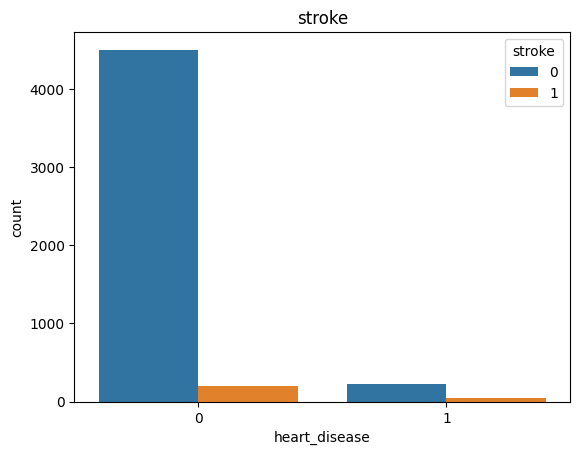

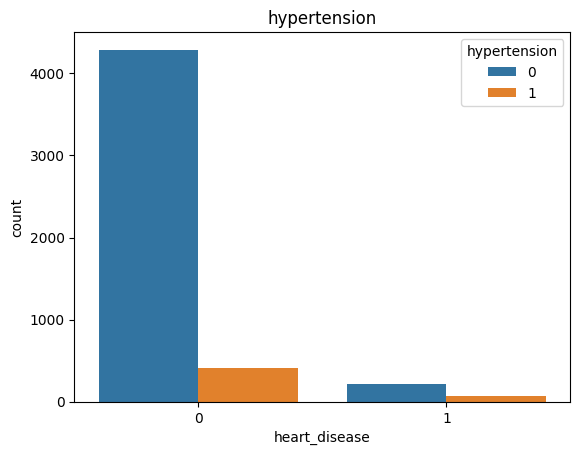

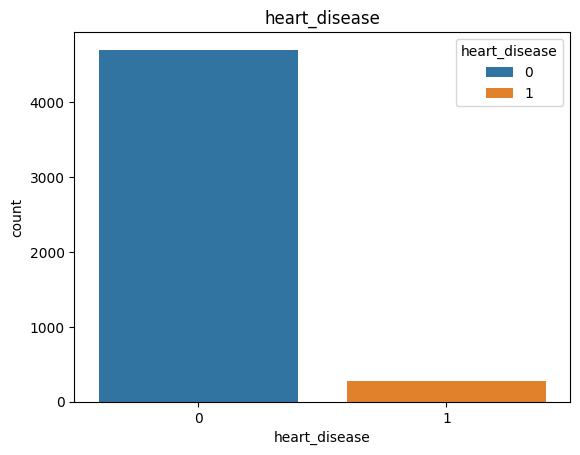

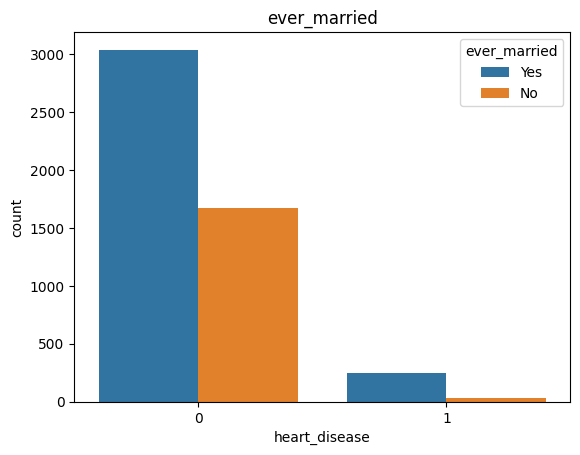

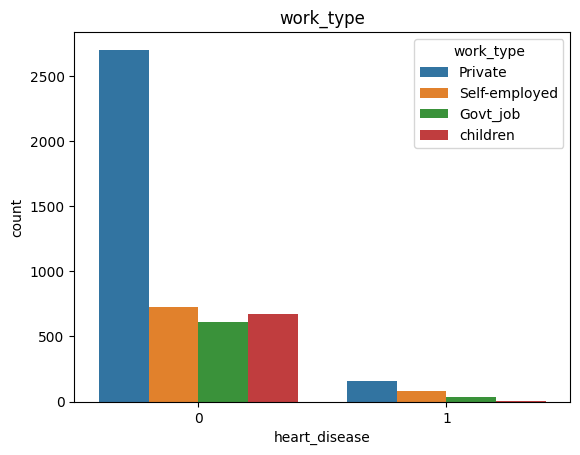

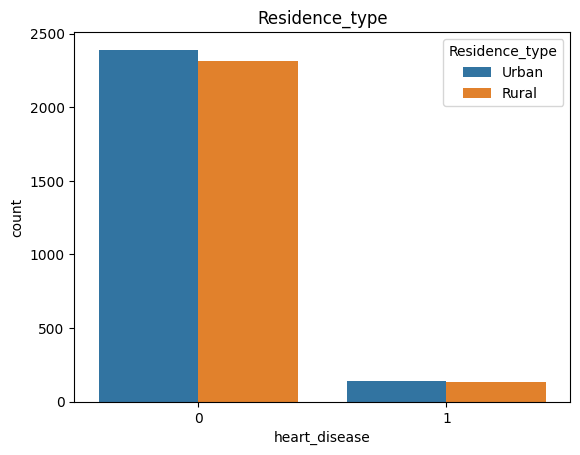

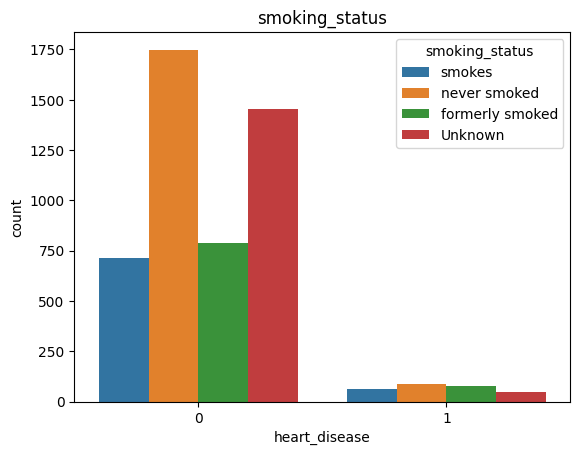

In [9]:
# Visualizing data distribution
for i in hue_columns:
  plt.title(i)
  sns.countplot(data=df, x='heart_disease', hue=i)
  plt.show()

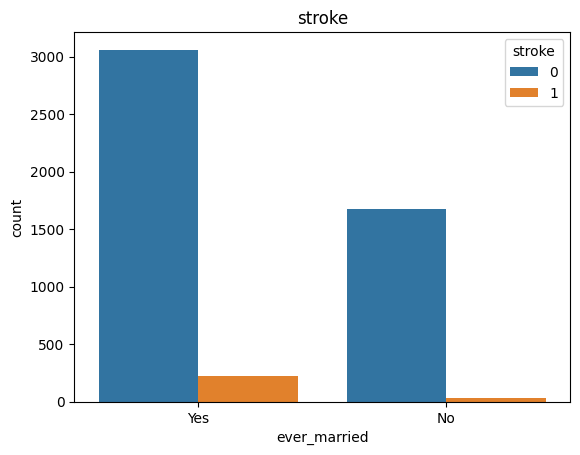

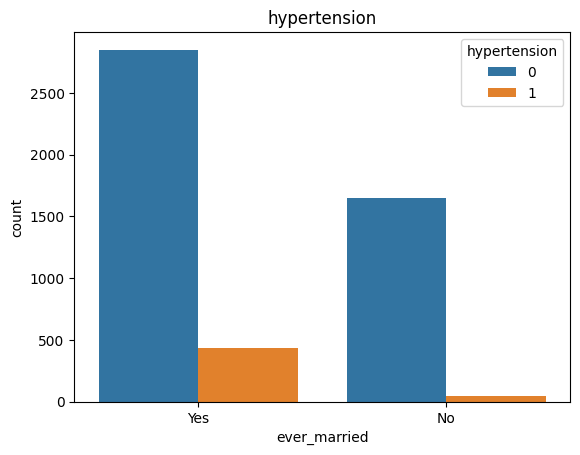

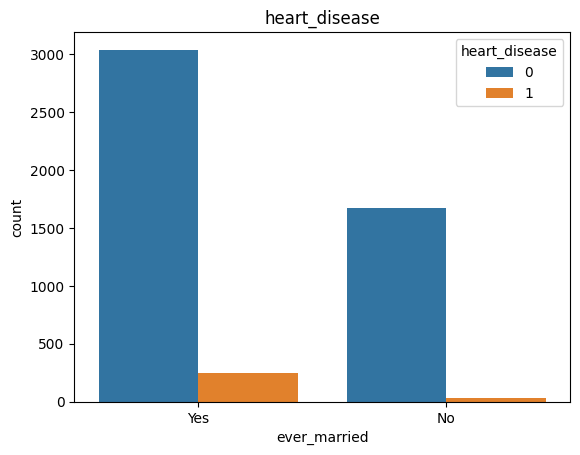

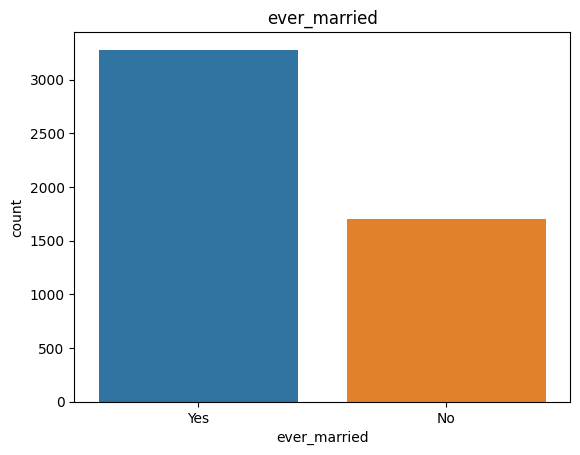

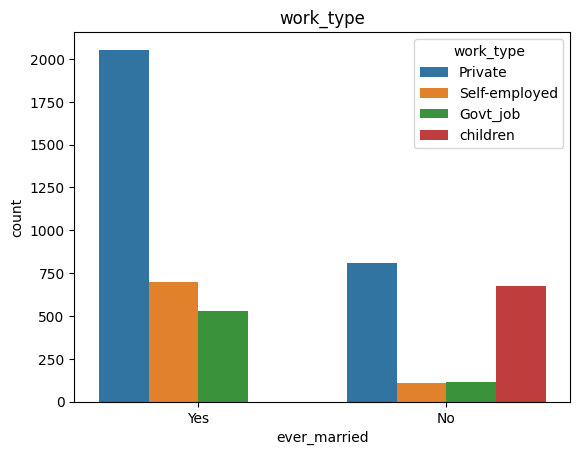

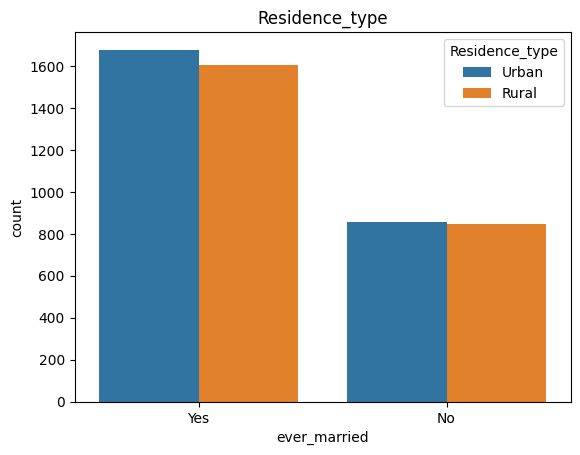

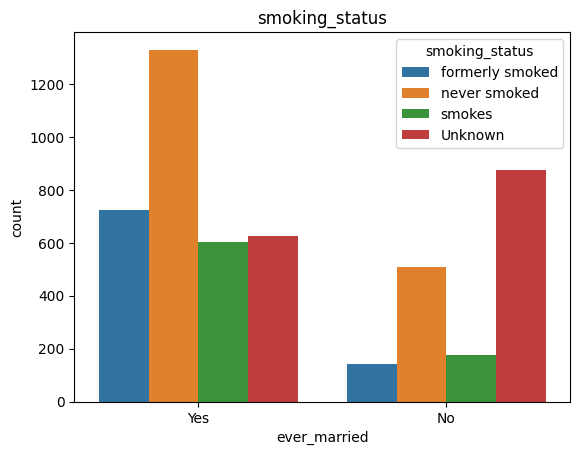

In [10]:
# Visualizing data distribution
for i in hue_columns:
  plt.title(i)
  sns.countplot(data=df, x='ever_married', hue=i)
  plt.show()

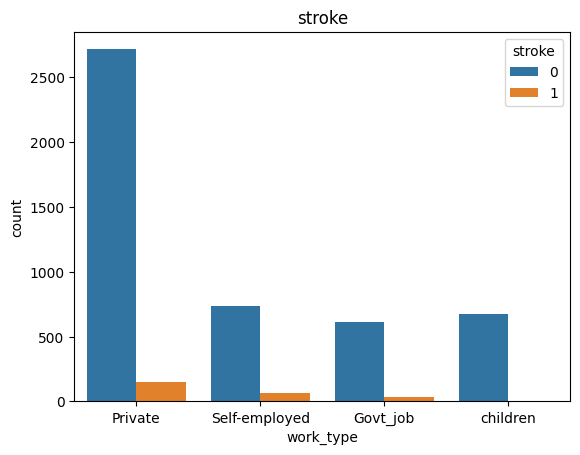

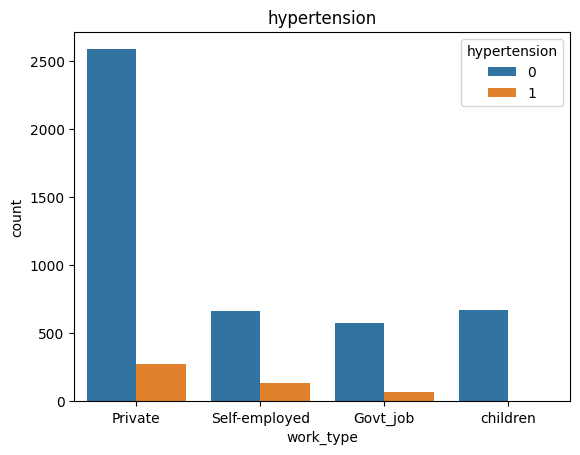

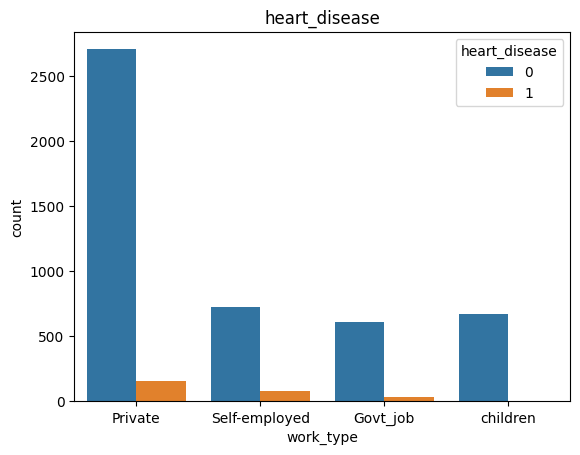

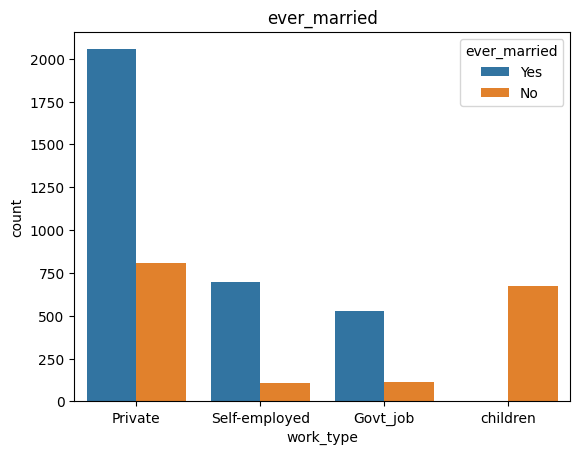

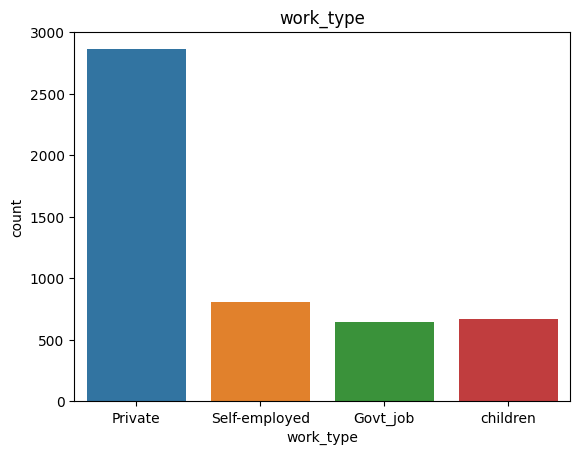

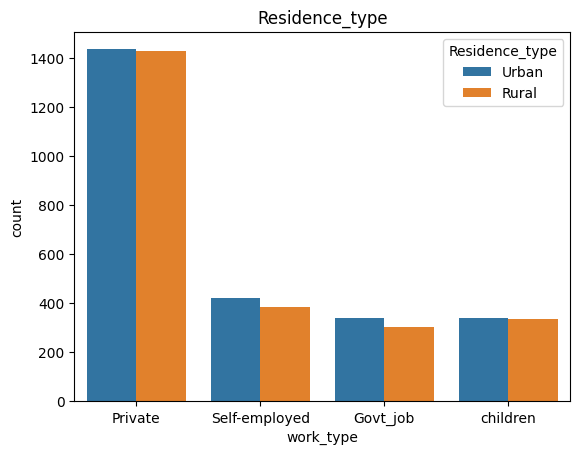

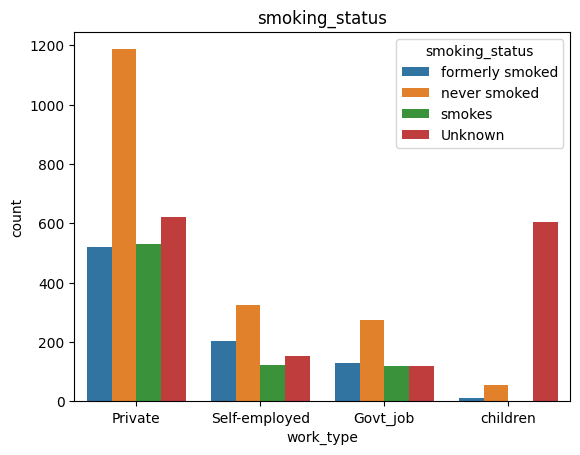

In [11]:
# Visualizing data distribution
for i in hue_columns:
  plt.title(i)
  sns.countplot(data=df, x='work_type', hue=i)
  plt.show()

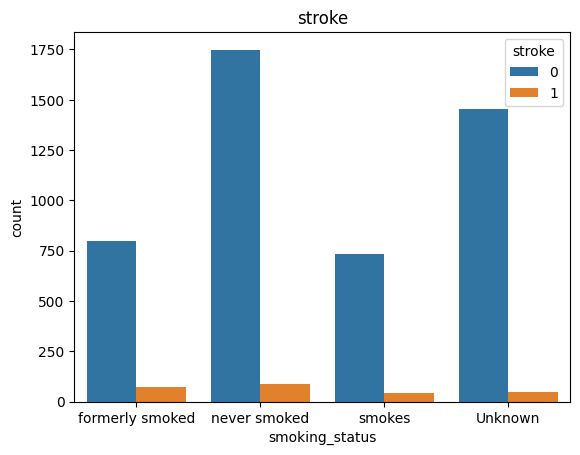

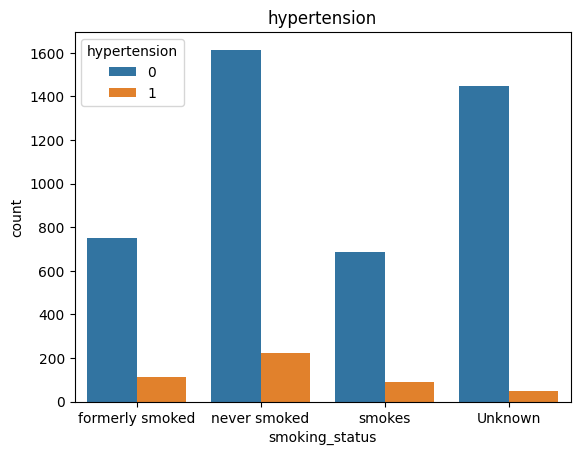

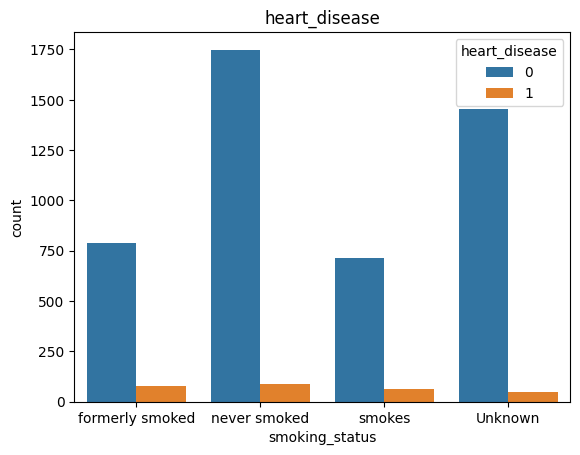

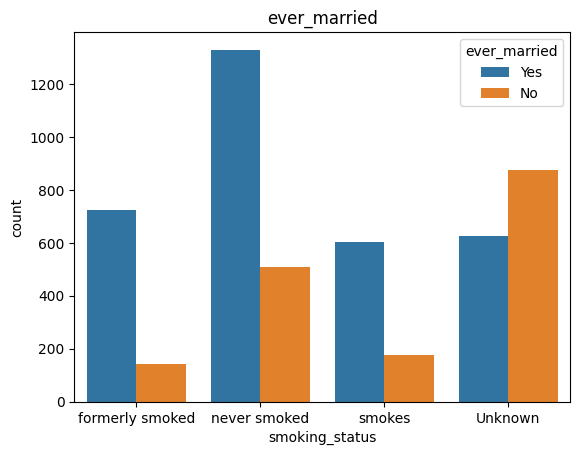

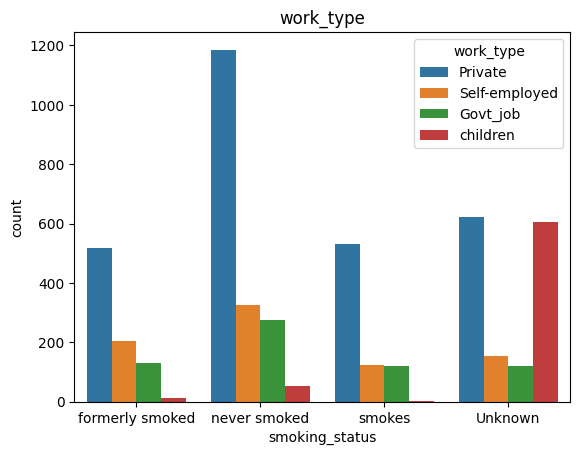

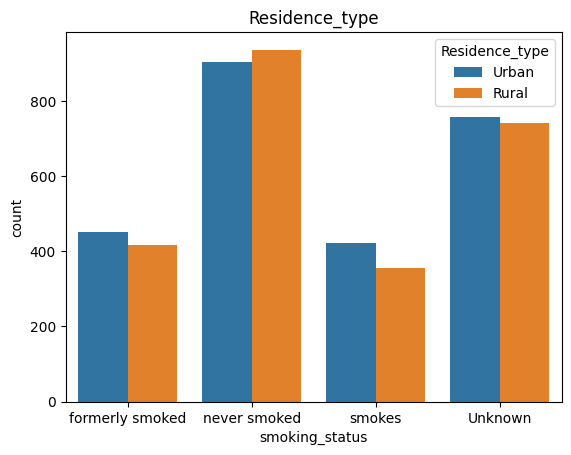

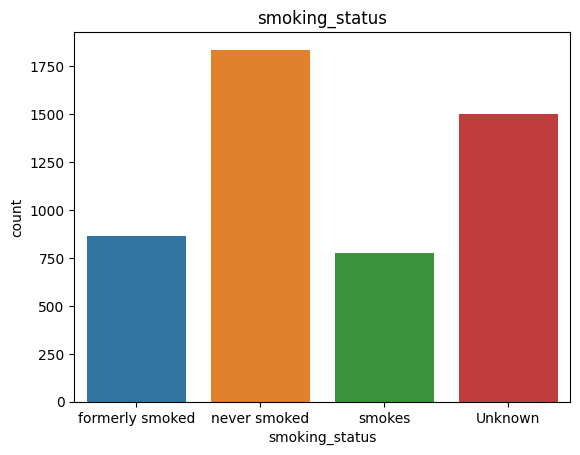

In [12]:
# Visualizing data distribution
for i in hue_columns:
  plt.title(i)
  sns.countplot(data=df, x='smoking_status', hue=i)
  plt.show()

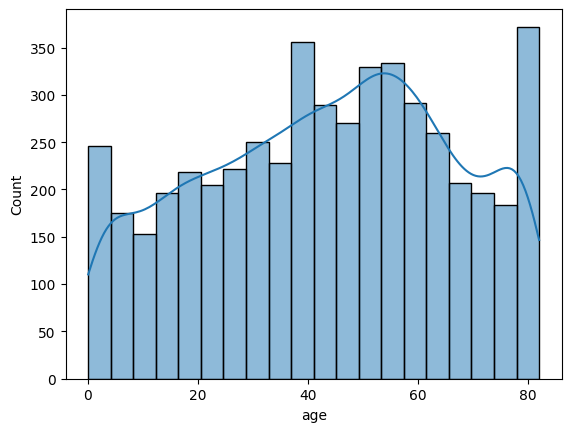

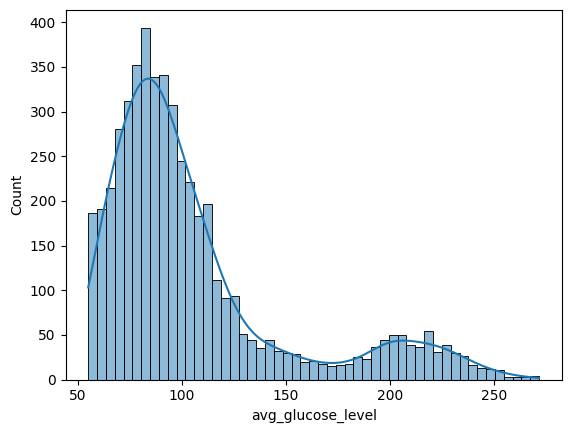

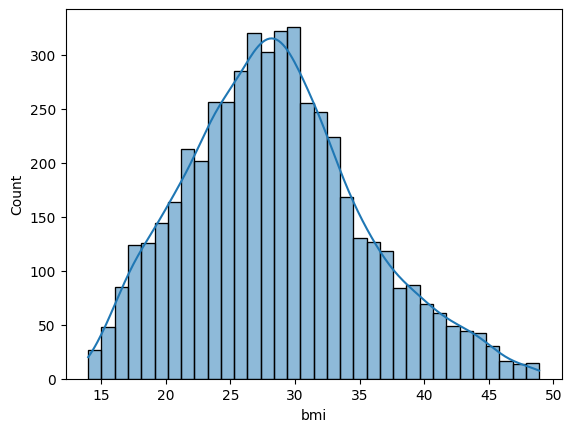

In [13]:
for i in ['age', 'avg_glucose_level','bmi']:
  sns.histplot(data=df, x=i, kde=True)
  plt.show()

> **Note**: The data suffer the imbalance class, as the amount of patients with stroke classified is more than the patients with no stroke.

> For avg_glucose_level and bmi, it appears as left-skew where more patients have avg_glucose_level from 50 to ~130 and bmi of 20 to ~37

In [14]:
data = pd.DataFrame(df.groupby([
    'Residence_type',
    'hypertension',
    'heart_disease',
    'ever_married',
    'work_type',
    'smoking_status',
    'stroke',
    'gender'])['gender'].count())
stats_stroke = data.to_string()
print(stats_stroke)

                                                                                                    gender
Residence_type hypertension heart_disease ever_married work_type     smoking_status  stroke gender        
Rural          0            0             No           Govt_job      Unknown         0      Female       4
                                                                                            Male         3
                                                                     formerly smoked 0      Female       4
                                                                                            Male         5
                                                                     never smoked    0      Female      18
                                                                                            Male         7
                                                                     smokes          0      Female       4
                                     

In [15]:
colums_target = []
for i in df.columns:
  if(len(df[i].unique()) < 10 and i != 'stroke'):
    colums_target.append(i)
    print(f'Column {i} with length of unique value {len(df[i].unique())}. Value: {df[i].unique()}')

Column gender with length of unique value 2. Value: ['Male' 'Female']
Column hypertension with length of unique value 2. Value: [0 1]
Column heart_disease with length of unique value 2. Value: [1 0]
Column ever_married with length of unique value 2. Value: ['Yes' 'No']
Column work_type with length of unique value 4. Value: ['Private' 'Self-employed' 'Govt_job' 'children']
Column Residence_type with length of unique value 2. Value: ['Urban' 'Rural']
Column smoking_status with length of unique value 4. Value: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


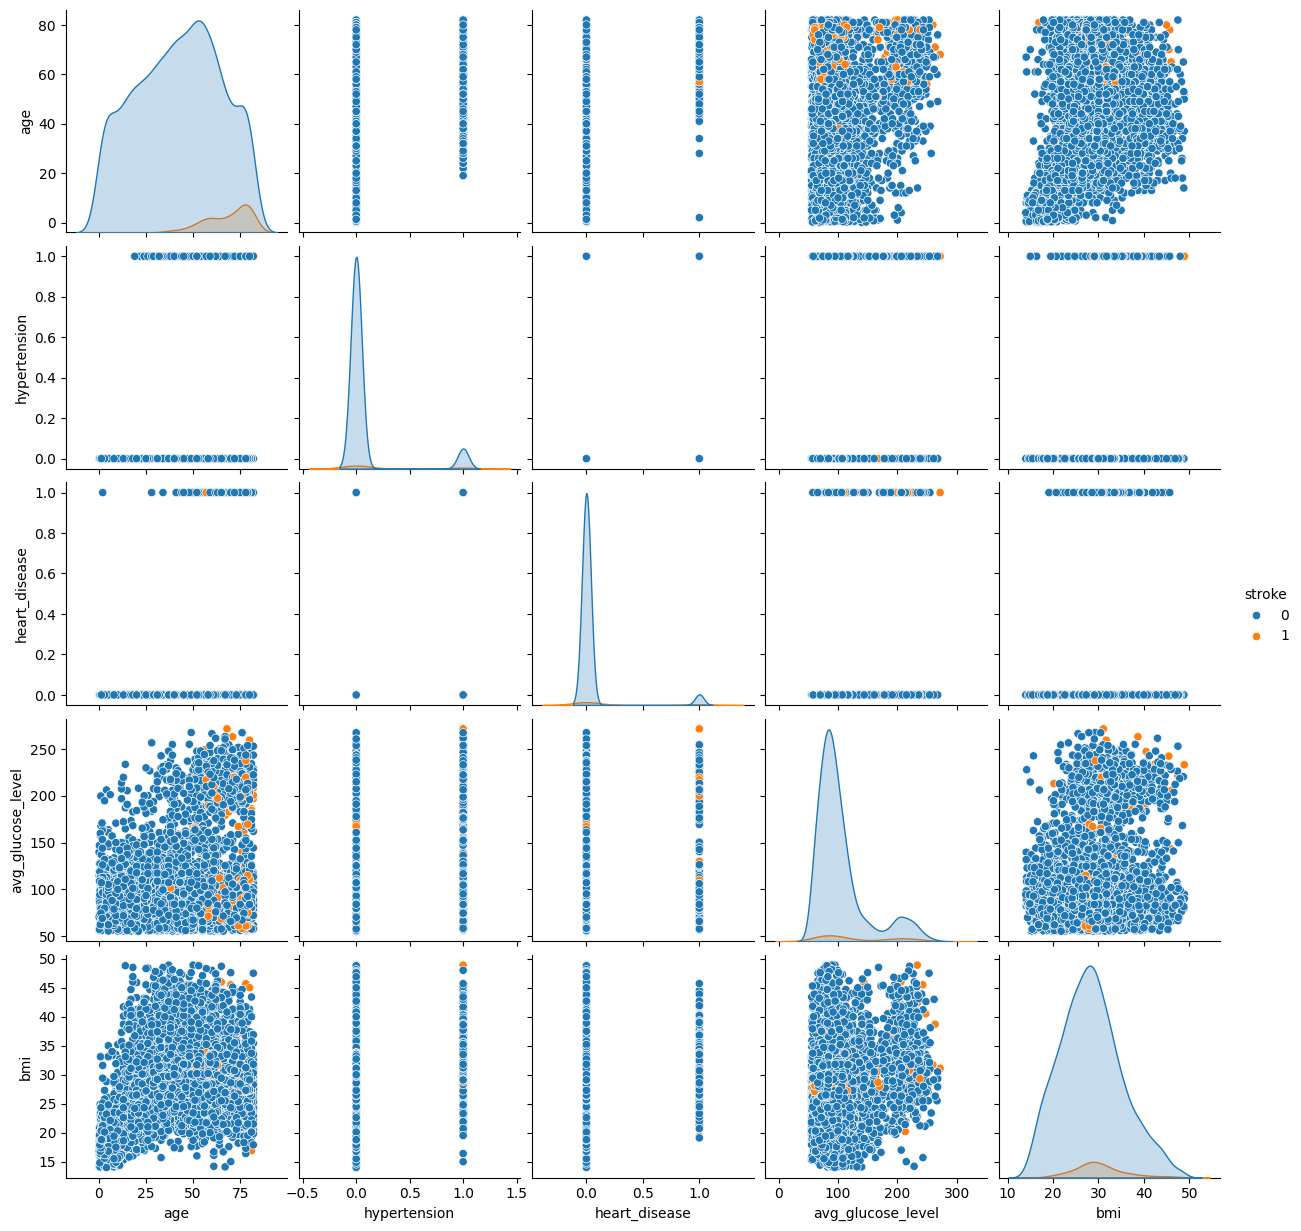

In [16]:
sns.pairplot(data=df, hue="stroke")

# Data Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [18]:
ss = StandardScaler()
mm = MinMaxScaler()

In [19]:
df[['age','avg_glucose_level','bmi']] = ss.fit_transform(df[['age','avg_glucose_level','bmi']])

In [20]:
data_matrix = pd.get_dummies(df, prefix=None, columns=colums_target, sparse=False)
data_matrix.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.040584,2.723411,1.193238,1,False,True,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
1,1.614270,-0.000523,0.589390,1,False,True,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,0.246250,1.448529,0.869222,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,1.570141,1.512650,-0.662492,1,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,True,False
4,1.658400,1.780895,0.073909,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [21]:
# Splitting data
X = data_matrix[[i for i in data_matrix.columns if i != 'stroke']]
y = data_matrix['stroke']
print(X.shape)
print(y.shape)

(4981, 21)
(4981,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3984, 21)
(997, 21)
(3984,)
(997,)


# Modelling

> There are some very weak correlation between
* age - hypertension
* age - bmi
* age - average glucose level
* age - heart_disease
* age - stroke

> There is an inverse strong correlation between age and married status as well as work type that belongs to children category

> There is a positive correlation between person who belongs to unknown group of smoking status and working type related to children

> There is a weak chance (based on correlation) that stroke hit people with higher age, higher avg_glucose_level, and hypertension history


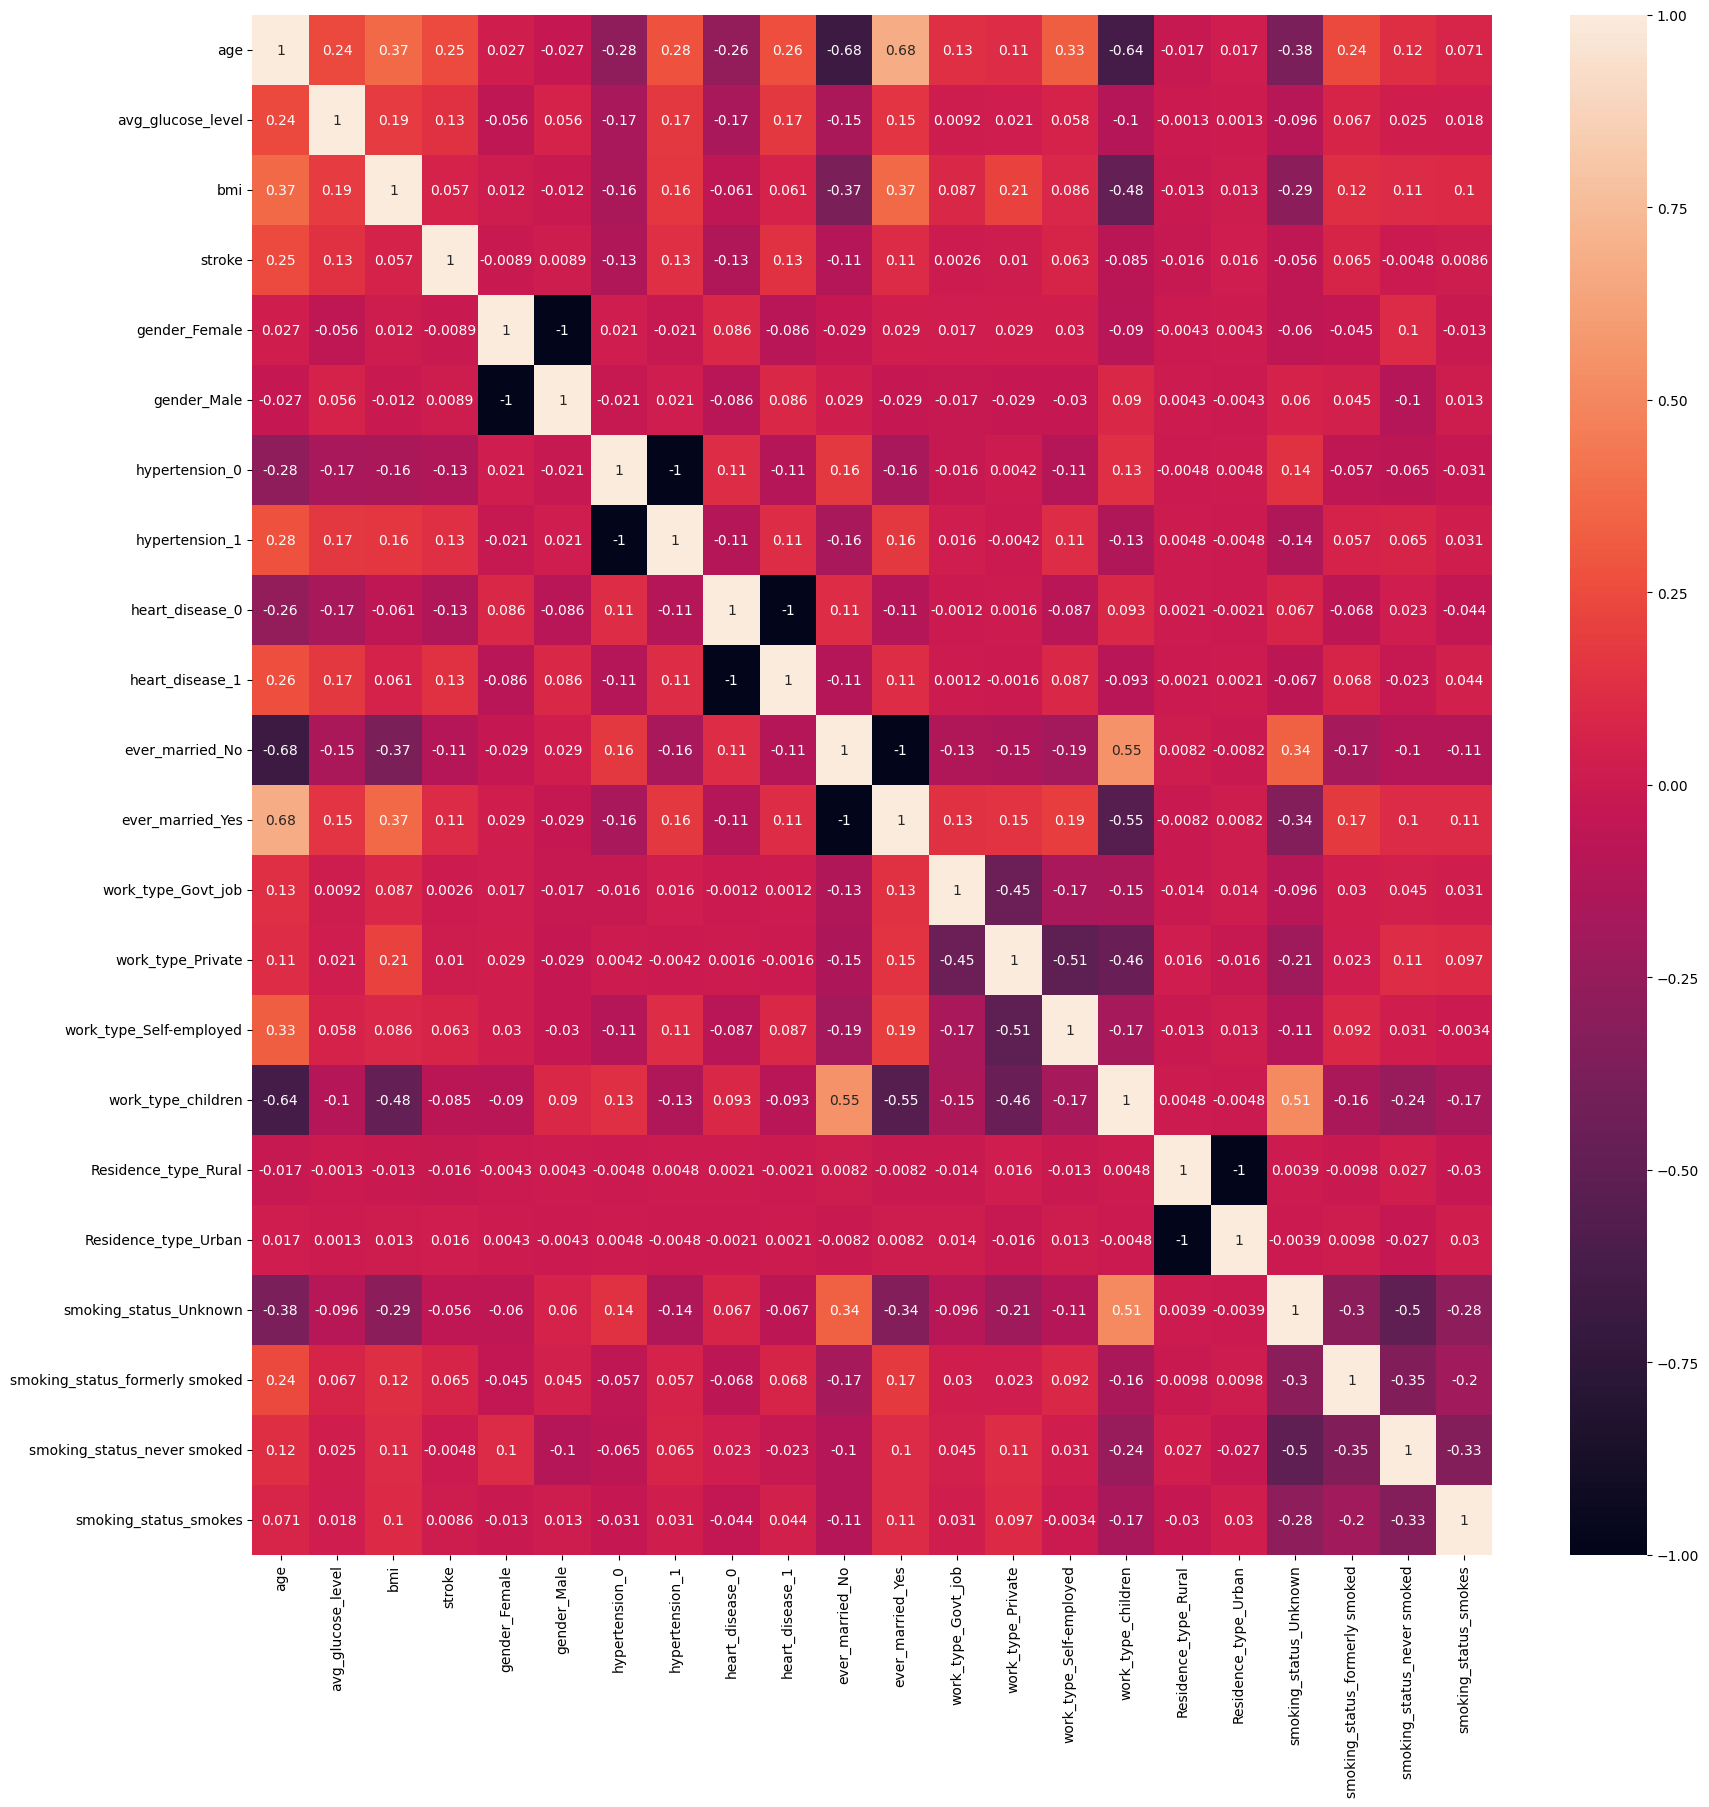

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(data_matrix.corr(), annot=True)
plt.show()

### Support Vector Machine

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [25]:
model = SVC(kernel='rbf',class_weight='balanced', random_state=50)
model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=50)

In [26]:
prediction = model.predict(X_test)

In [27]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       948
           1       0.12      0.71      0.20        49

    accuracy                           0.73       997
   macro avg       0.55      0.72      0.52       997
weighted avg       0.94      0.73      0.80       997



### RandomForest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(criterion='gini', max_depth=6, random_state=50, class_weight='balanced_subsample')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       random_state=50)

In [30]:
prediction = rfc.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       948
           1       0.15      0.76      0.24        49

    accuracy                           0.77       997
   macro avg       0.56      0.76      0.55       997
weighted avg       0.94      0.77      0.83       997



<Figure size 2000x2000 with 0 Axes>

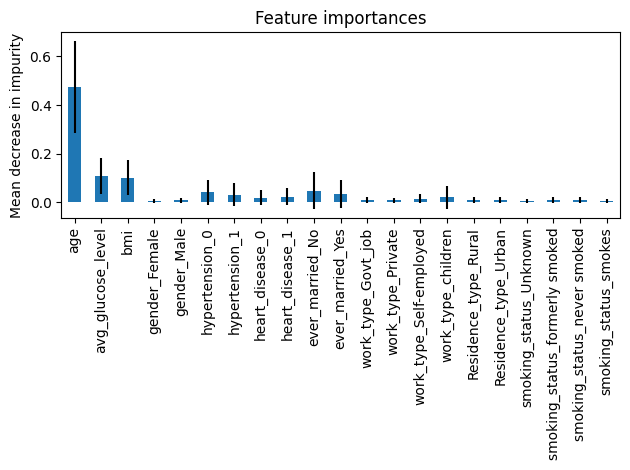

In [31]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
forest_importances = pd.Series(importances, index=list(X_test.columns))

plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

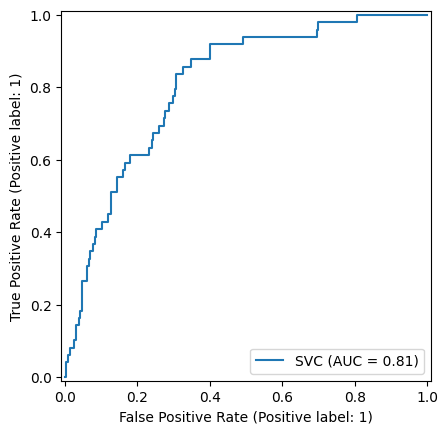

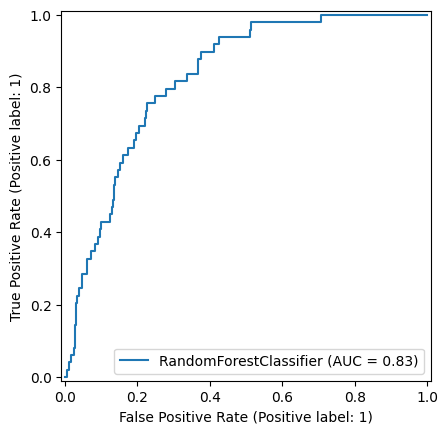

In [32]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

# XGBoost

In [33]:
from xgboost import XGBClassifier


model = XGBClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       948
           1       0.44      0.14      0.22        49

    accuracy                           0.95       997
   macro avg       0.70      0.57      0.59       997
weighted avg       0.93      0.95      0.94       997



<Figure size 2000x2000 with 0 Axes>

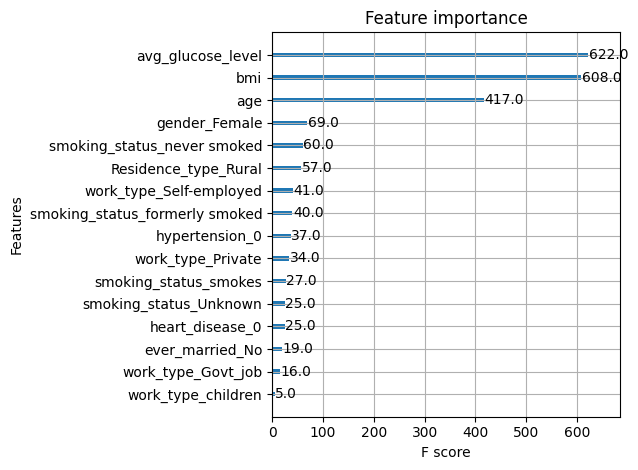

In [34]:
from xgboost import plot_importance

# Plot
plt.figure(figsize=(20,20))
plot_importance(model)
plt.tight_layout()
plt.show()

# Model-Testing

In [35]:
# Testing model with test dataset
X_test.iloc[:1]

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,...,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1988,-1.607197,-0.973214,-1.826005,False,True,True,False,True,False,True,...,False,False,False,True,True,False,True,False,False,False


In [36]:
print(f'SVM: {model.predict(X_test.iloc[:1])} | RF: {rfc.predict(X_test.iloc[:1])}')

SVM: [0] | RF: [0]
